# Introduction
I chose to apply the statistical process of Principal Component Analysis to analyze the US treasury market. Principal Component Analysis aims to reduce the dimensionality and compress data in situations where one may have many closely related variables. Principle Component Analysis will perform a linear transformation on the data so that most of the variance of the high dimension set of interest rates is captured in the first few principal components. Additionally, it is helpful to utilize PCA to visualize your data in easier ways, considering there are now fewer variables to work with. Visualizing the data becomes much more appealing and easier to work with. One of the features of PCA is that important information is extracted in the form of components. The first component will capture the maximum variance in the data set, and then determines the direction of the highest variability in the data. In this case, each of the US Treasuries have quite a high correlation with each other. The PCA model will decompose the structure of the set of rates into factors that are common. It is known that PCA is typically most useful where the variables are closely related, and as mentioned in this case the rates are highly correlated as shown by the correlation matrix. We aim to extract important information in the form of components. A final goal of the project is to determine whether these interest rates truly are closely related.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Step 1 - Process and Clean the Data

As I briefly mentioned before, I decided to download the data for 30 individual US treasury zero-coupon bond rates over a period of roughly 37 years from 1985 until 2022. One of my first steps was to obtain the data online and export it into excel so we can observe and clean the data. I utilized the Federal Reserve website, which tracks many historical interest rates When I downloaded the set of data, I changed some of the column names and cleaned the rows so that python would easily recognize the data set. After loading the data into python, I dropped any NAN values that may have been recorded due to Holidays or weekends and plotted the data 

In [2]:
df = pd.read_csv("The US Treasure Yield Curve.csv", index_col=0, parse_dates=True)

In [3]:
df.columns = ["1 Year Zero Coupon Bond", "2 Year Zero Coupon Bond", "3 Year Zero Coupon Bond", \
              "4 Year Zero Coupon Bond", "5 Year Zero Coupon Bond", "6 Year Zero Coupon Bond", \
              "7 Year Zero Coupon Bond", "8 Year Zero Coupon Bond", "9 Year Zero  Coupon Bond", \
              "10 Year Zero Coupon Bond", "11 Year Zero Coupon Bond", "12 Year Zero Coupon Bond", \
              "13 Year Zero Coupon Bond", "14 Year Zero Coupon Bond", "15 Year Zero Coupon Bond", \
              "16 Year Zero Coupon Bond", "17 Year Zero Coupon Bond", "18 Year Zero Coupon Bond", \
              "19 Year Zero Coupon Bond", "20 Year Zero Coupon Bond", "21 Year Zero Coupon Bond", \
              "22 Year Zero Coupon Bond", "23 Year Zero Coupon Bond", "24 Year Zero Coupon Bond", \
              "25 Year Zero Coupon Bond", "26 Year Zero Coupon Bond", "27 Year Zero Coupon Bond", \
              "28 Year Zero Coupon Bond", "29 Year Zero Coupon Bond", "30 Year Zero Coupon Bond"]

In [4]:
df.head()

,1 Year Zero Coupon Bond,2 Year Zero Coupon Bond,3 Year Zero Coupon Bond,4 Year Zero Coupon Bond,5 Year Zero Coupon Bond,6 Year Zero Coupon Bond,7 Year Zero Coupon Bond,8 Year Zero Coupon Bond,9 Year Zero Coupon Bond,10 Year Zero Coupon Bond,...,21 Year Zero Coupon Bond,22 Year Zero Coupon Bond,23 Year Zero Coupon Bond,24 Year Zero Coupon Bond,25 Year Zero Coupon Bond,26 Year Zero Coupon Bond,27 Year Zero Coupon Bond,28 Year Zero Coupon Bond,29 Year Zero Coupon Bond,30 Year Zero Coupon Bond
Date,,,,,,,,,,,,,,,,,,,,,
1985-11-25,7.8551,8.3626,8.7469,9.0408,9.2686,9.4481,9.5924,9.7110,9.8108,9.8969,...,10.4821,10.5196,10.5553,10.5893,10.6217,10.6526,10.6819,10.7099,10.7365,10.7618
1985-11-26,7.8527,8.3575,8.7420,9.0376,9.2677,9.4494,9.5956,9.7154,9.8158,9.9015,...,10.4497,10.4827,10.5139,10.5435,10.5715,10.5982,10.6234,10.6474,10.6701,10.6917
1985-11-27,7.8425,8.3522,8.7339,9.0231,9.2453,9.4193,9.5586,9.6727,9.7688,9.8515,...,10.4157,10.4514,10.4853,10.5176,10.5482,10.5773,10.6049,10.6311,10.6560,10.6796
1985-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-11-29,7.7914,8.3148,8.6991,8.9852,9.2024,9.3712,9.5061,9.6172,9.7115,9.7938,...,10.3798,10.4172,10.4526,10.4861,10.5179,10.5479,10.5763,10.6032,10.6287,10.6528


In [5]:
len(df)

9495

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9495 entries, 1985-11-25 to 2022-04-15
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   1 Year Zero Coupon Bond   9084 non-null   float64
 1   2 Year Zero Coupon Bond   9084 non-null   float64
 2   3 Year Zero Coupon Bond   9084 non-null   float64
 3   4 Year Zero Coupon Bond   9084 non-null   float64
 4   5 Year Zero Coupon Bond   9084 non-null   float64
 5   6 Year Zero Coupon Bond   9084 non-null   float64
 6   7 Year Zero Coupon Bond   9084 non-null   float64
 7   8 Year Zero Coupon Bond   9084 non-null   float64
 8   9 Year Zero  Coupon Bond  9084 non-null   float64
 9   10 Year Zero Coupon Bond  9084 non-null   float64
 10  11 Year Zero Coupon Bond  9084 non-null   float64
 11  12 Year Zero Coupon Bond  9084 non-null   float64
 12  13 Year Zero Coupon Bond  9084 non-null   float64
 13  14 Year Zero Coupon Bond  9084 non-null   flo

In [7]:
df.columns = ["1 Year Zero Coupon Bond", "2 Year Zero Coupon Bond", "3 Year Zero Coupon Bond", \
              "4 Year Zero Coupon Bond", "5 Year Zero Coupon Bond", "6 Year Zero Coupon Bond", \
              "7 Year Zero Coupon Bond", "8 Year Zero Coupon Bond", "9 Year Zero  Coupon Bond", \
              "10 Year Zero Coupon Bond", "11 Year Zero Coupon Bond", "12 Year Zero Coupon Bond", \
              "13 Year Zero Coupon Bond", "14 Year Zero Coupon Bond", "15 Year Zero Coupon Bond", \
              "16 Year Zero Coupon Bond", "17 Year Zero Coupon Bond", "18 Year Zero Coupon Bond", \
              "19 Year Zero Coupon Bond", "20 Year Zero Coupon Bond", "21 Year Zero Coupon Bond", \
              "22 Year Zero Coupon Bond", "23 Year Zero Coupon Bond", "24 Year Zero Coupon Bond", \
              "25 Year Zero Coupon Bond", "26 Year Zero Coupon Bond", "27 Year Zero Coupon Bond", \
              "28 Year Zero Coupon Bond", "29 Year Zero Coupon Bond", "30 Year Zero Coupon Bond"]
df.dropna(inplace=True)
df.head()

,1 Year Zero Coupon Bond,2 Year Zero Coupon Bond,3 Year Zero Coupon Bond,4 Year Zero Coupon Bond,5 Year Zero Coupon Bond,6 Year Zero Coupon Bond,7 Year Zero Coupon Bond,8 Year Zero Coupon Bond,9 Year Zero Coupon Bond,10 Year Zero Coupon Bond,...,21 Year Zero Coupon Bond,22 Year Zero Coupon Bond,23 Year Zero Coupon Bond,24 Year Zero Coupon Bond,25 Year Zero Coupon Bond,26 Year Zero Coupon Bond,27 Year Zero Coupon Bond,28 Year Zero Coupon Bond,29 Year Zero Coupon Bond,30 Year Zero Coupon Bond
Date,,,,,,,,,,,,,,,,,,,,,
1985-11-25,7.8551,8.3626,8.7469,9.0408,9.2686,9.4481,9.5924,9.7110,9.8108,9.8969,...,10.4821,10.5196,10.5553,10.5893,10.6217,10.6526,10.6819,10.7099,10.7365,10.7618
1985-11-26,7.8527,8.3575,8.7420,9.0376,9.2677,9.4494,9.5956,9.7154,9.8158,9.9015,...,10.4497,10.4827,10.5139,10.5435,10.5715,10.5982,10.6234,10.6474,10.6701,10.6917
1985-11-27,7.8425,8.3522,8.7339,9.0231,9.2453,9.4193,9.5586,9.6727,9.7688,9.8515,...,10.4157,10.4514,10.4853,10.5176,10.5482,10.5773,10.6049,10.6311,10.6560,10.6796
1985-11-29,7.7914,8.3148,8.6991,8.9852,9.2024,9.3712,9.5061,9.6172,9.7115,9.7938,...,10.3798,10.4172,10.4526,10.4861,10.5179,10.5479,10.5763,10.6032,10.6287,10.6528
1985-12-02,7.8176,8.3457,8.7359,9.0294,9.2550,9.4327,9.5766,9.6962,9.7983,9.8874,...,10.4856,10.5206,10.5534,10.5842,10.6131,10.6402,10.6657,10.6897,10.7123,10.7335


In [8]:
# stationaryDf = df - df.shift(1)
# stationaryDf.dropna(inplace=True)
# stationaryDf.head()

In [9]:
df.describe()

,1 Year Zero Coupon Bond,2 Year Zero Coupon Bond,3 Year Zero Coupon Bond,4 Year Zero Coupon Bond,5 Year Zero Coupon Bond,6 Year Zero Coupon Bond,7 Year Zero Coupon Bond,8 Year Zero Coupon Bond,9 Year Zero Coupon Bond,10 Year Zero Coupon Bond,...,21 Year Zero Coupon Bond,22 Year Zero Coupon Bond,23 Year Zero Coupon Bond,24 Year Zero Coupon Bond,25 Year Zero Coupon Bond,26 Year Zero Coupon Bond,27 Year Zero Coupon Bond,28 Year Zero Coupon Bond,29 Year Zero Coupon Bond,30 Year Zero Coupon Bond
count,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,...,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000,9084.000000
mean,3.387204,3.630554,3.852435,4.054528,4.237685,4.402481,4.549666,4.680221,4.795288,4.896097,...,5.379384,5.388375,5.394096,5.396929,5.397220,5.395276,5.391368,5.385741,5.378613,5.370177
std,2.654382,2.646925,2.599177,2.544903,2.494574,2.451132,2.414752,2.384603,2.359576,2.338580,...,2.201060,2.190556,2.180116,2.169760,2.159515,2.149410,2.139482,2.129763,2.120289,2.111094
min,0.055400,0.102000,0.127200,0.168500,0.221800,0.280600,0.341300,0.402000,0.461800,0.520200,...,0.991900,1.024800,1.056700,1.087600,1.117400,1.146200,1.173800,1.200400,1.225800,1.250300
25%,0.622100,0.939075,1.363275,1.638925,1.850875,2.076225,2.274075,2.445050,2.606450,2.738600,...,3.258000,3.281625,3.297650,3.308800,3.319275,3.330000,3.340325,3.352075,3.363175,3.374425
50%,3.356800,3.692350,3.903700,4.098750,4.250800,4.346515,4.463650,4.547400,4.626800,4.726650,...,5.325400,5.331100,5.332350,5.333250,5.329300,5.322863,5.309800,5.290842,5.271400,5.245000
75%,5.606396,5.853543,5.997690,6.144120,6.244156,6.359981,6.457023,6.541915,6.624757,6.681421,...,7.151408,7.169334,7.175354,7.177718,7.174382,7.176162,7.162366,7.148856,7.139158,7.120667
max,9.802028,9.733082,9.659473,9.599171,9.745500,9.857100,9.949600,10.050900,10.125900,10.180500,...,10.485600,10.520600,10.555300,10.589300,10.621700,10.652600,10.681900,10.709900,10.736500,10.761800


## Step 2 - Visualize the Interest Rates

- There are 30 different interest rates in the dataset. All of the data are in the same period of time (1985 - 2022).

- The swap rates are likely highly correlated becasue they all have samiliar patterns.

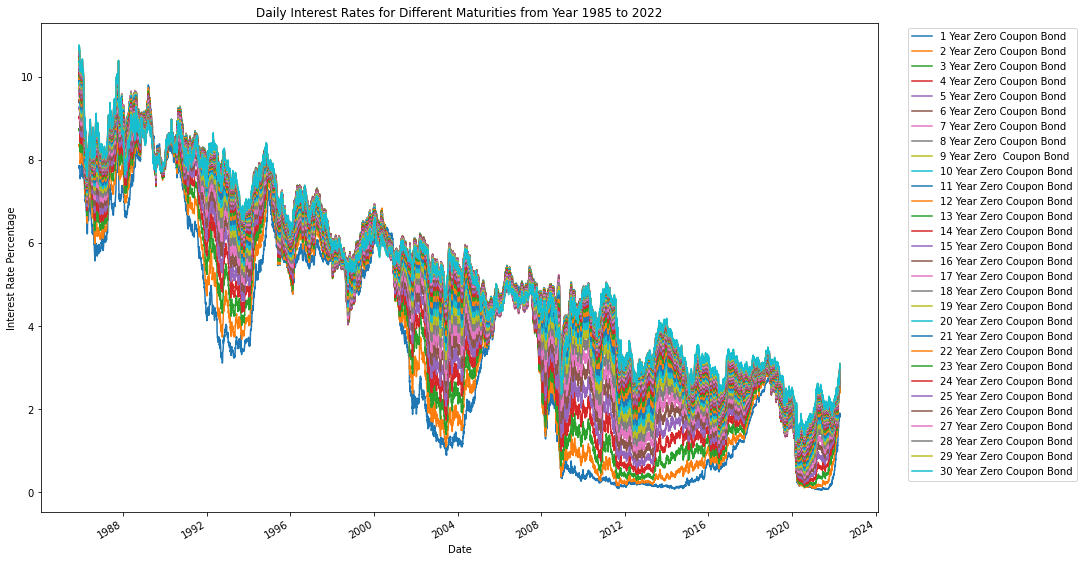

In [10]:
df.plot(figsize=(15,10))
plt.ylabel("Interest Rate Percentage")
plt.title("Daily Interest Rates for Different Maturities from Year 1985 to 2022")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

## Step 3 - Visualize Covariance and Correlation Matrices

- The covariance and the correlation matrices show that most of the interest rates are highly and positively correlated to each other. 


- The high correlation between the interest rates supports the PCA model to reduce dimensionality, as the variance of the data points projection onto the first principal component will be much larger than other principal components, the first principal component will be able to explain variance well.

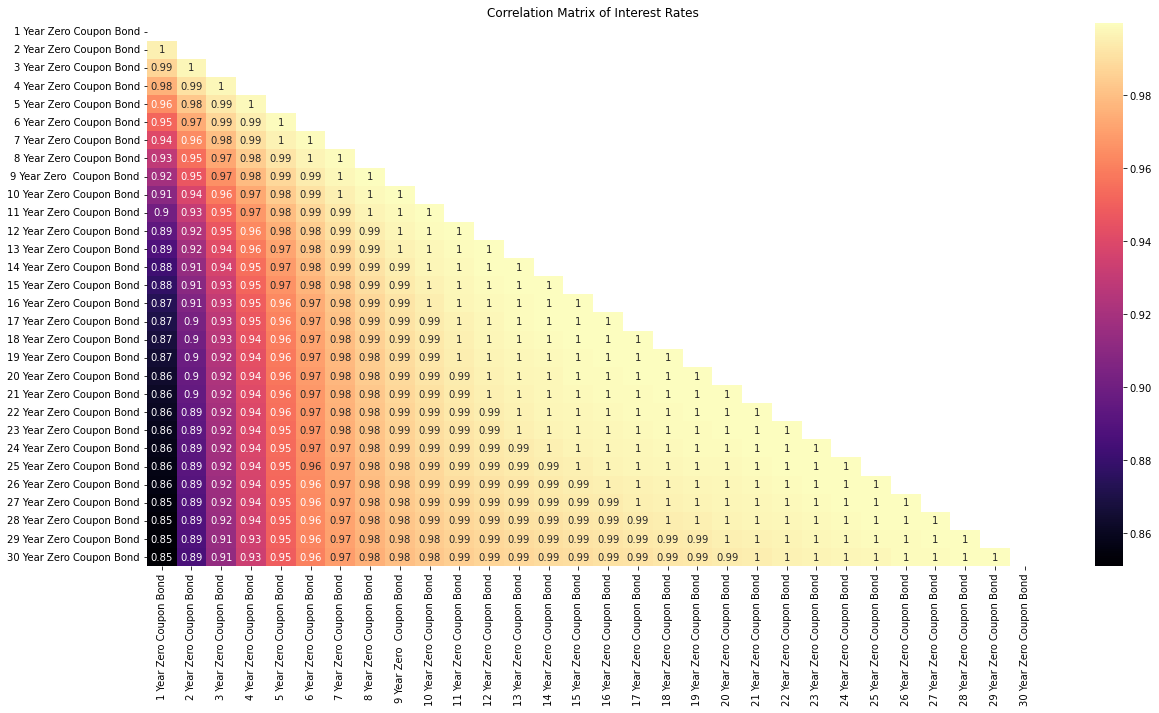

In [11]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="magma")

plt.title("Correlation Matrix of Interest Rates")
plt.show()

In [12]:
array = df.to_numpy()
array = np.transpose(df)
covariance = np.cov(array)
covariance.shape

(30, 30)

In [13]:
dfColumns = df.columns

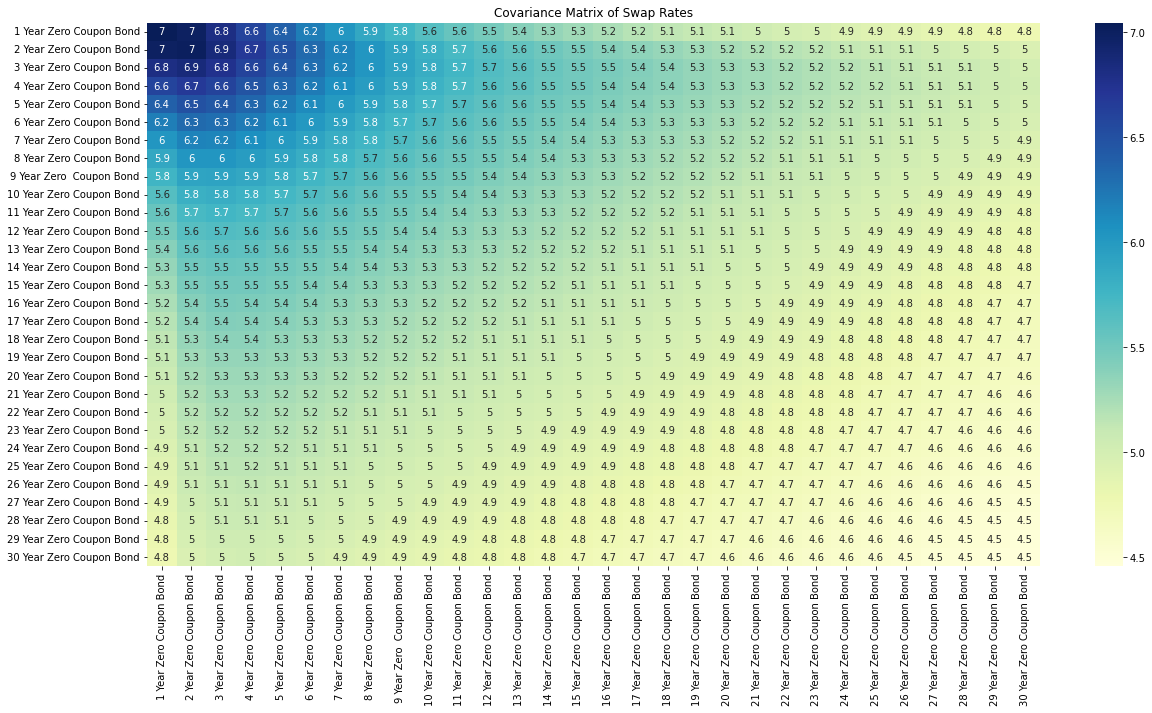

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(covariance, annot=True, xticklabels=dfColumns, yticklabels=dfColumns, cmap="YlGnBu")
plt.title("Covariance Matrix of Swap Rates")
plt.show()

## Step 4 - Perform PCA


- Using covariance matrix to find the principal components. Since there are 30 variables in the dataset, 30 components can be found, if 30 components are derived from the PCA model, they can explain the total variance of 1, but according to the correlation matrix plotted, the 30 variables are highly correlated, meaning only a few principal components are needed to explain most variance of the projection. In this project, 3 components are used to explain 99% of the variance. As a result, the PCA model reduces the the 30 dimensional data (30 different interest rates) to 3 dimensional data (3 components).

In [15]:
pca = PCA(n_components=30)
results = pca.fit_transform(df)
components = pca.components_
expVar = pca.explained_variance_ratio_
for i in range(30):
    print(expVar.cumsum()[i])

0.9715461702366426
0.9976954645577685
0.9991690857955408
0.9998895330602404
0.9999903678043193
0.9999994580606549
0.9999999410279032
0.9999999955067523
0.9999999996548955
0.9999999999199443
0.9999999999367354
0.9999999999408188
0.999999999944454
0.9999999999480219
0.9999999999515784
0.9999999999550734
0.9999999999585368
0.9999999999619499
0.9999999999653421
0.9999999999686946
0.9999999999720175
0.9999999999752858
0.999999999978493
0.9999999999816983
0.9999999999848245
0.9999999999879263
0.999999999991008
0.9999999999940746
0.9999999999970628
0.9999999999999999


In [16]:
pca = PCA(n_components=3)
results = pca.fit_transform(df)
components = pca.components_
expVar = pca.explained_variance_ratio_
expVar.cumsum()

array([0.97154617, 0.99769546, 0.99916909])

## Step 5 - Plot PVE

- Making a scree plot to show how much each component can explain the variance. The first component has the maximum variance of the projection, so it always has the highest explained variance ratio. In this case, the first component has a explained variance ratio of 0.97, the second component has a explained variance ratio of 0.026, and the third component has a explained variance ratio of 0.0015.


- Making a cumulative scree plot to show the cumulative PVE by the 3 components. The first component has a cumulative explained variance ratio of 0.97, the first two components have a cumulative explained variance ratio of 0.997, and the 3 components have a cumulative explained variance ratio of 0.999.

In [17]:
pca30 = PCA(n_components=30)
pca30.fit_transform(df)
value = 0
for i in range(30):
    value += pca30.explained_variance_[i]
value

for i in range(3):
    print(pca.explained_variance_[i]/value)

0.9715461702366424
0.026149294321125782
0.001473621237772297


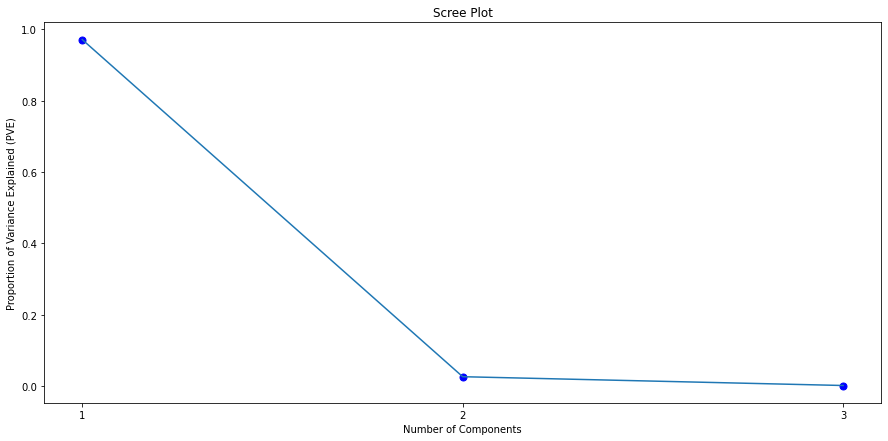

In [18]:
pca = PCA(n_components=3)
results = pca.fit_transform(df)
components = pca.components_
expVar = pca.explained_variance_ratio_
plt.figure(figsize=(15,7))
plt.plot(expVar, "bo", markersize=7)
plt.plot(expVar)
plt.xticks([0,1,2], [1,2,3])
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained (PVE)")
plt.title("Scree Plot")
plt.show()

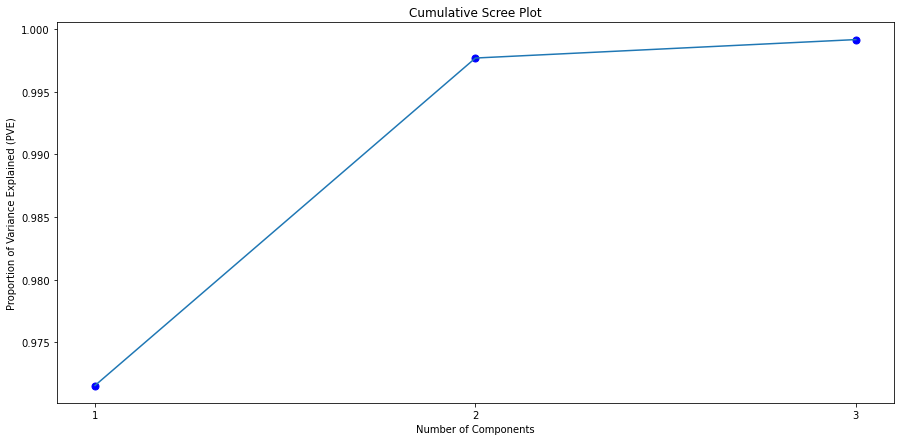

In [19]:
plt.figure(figsize=(15,7))
plt.plot(expVar.cumsum(), "bo", markersize=7)
plt.plot(expVar.cumsum())
plt.xticks([0,1,2], [1,2,3])
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained (PVE)")
plt.title("Cumulative Scree Plot")
plt.show()

## Step 6 - Visualize the Principal Components

- Using **components_** to get the coefficients of the 3 components and transposing the numpy array to visulize the data by using **matplotlib**.


- By looking at the plot below, it is easier to see that each component has 30 coefficient (30 points in each line). Each point represents a coefficient to a corresponding variable, the absolute coefficient values show how important the corresponding variable is to the component. For instance, the value of the first blue point on the left side is 0.195, which is the coefficient of the first variable (interest rate) in the first component. The first variable of the first component is **1 Year Zero Coupon Bond**. Therefore, when the **1 Year Zero Coupon Bond** goes up 1 unit, the first component goes up 0.195 unit. 

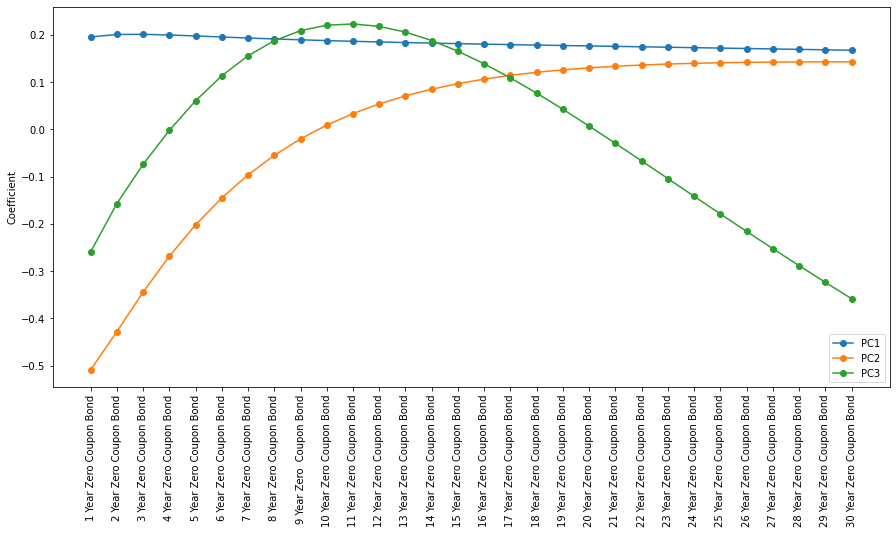

In [20]:
plt.figure(figsize=(15,7))
plt.plot(np.transpose(components), marker="o")
plt.legend(["PC1", "PC2", "PC3"])
plt.xticks(np.arange(30), dfColumns, rotation=90)
plt.ylabel("Coefficient")
plt.show()

## Step 7 - Calculate Principal Component Scores

Once the coefficients of the components are available, the component scores can be calculated. First, center the data, meaning subtracting the mean of a variable from each data point in that variable. Since each component is a linear combination, a component value is the sum of each centered data point multiplying by its coefficient. There are three components and 9084 samples, so a 9084*3 matrix can be derived.

In [21]:
scaler = StandardScaler(with_std=False)
scalerDf = scaler.fit_transform(df)
scalerDf = pd.DataFrame(scalerDf, columns=dfColumns, index=df.index)
scalerDf.head()

,1 Year Zero Coupon Bond,2 Year Zero Coupon Bond,3 Year Zero Coupon Bond,4 Year Zero Coupon Bond,5 Year Zero Coupon Bond,6 Year Zero Coupon Bond,7 Year Zero Coupon Bond,8 Year Zero Coupon Bond,9 Year Zero Coupon Bond,10 Year Zero Coupon Bond,...,21 Year Zero Coupon Bond,22 Year Zero Coupon Bond,23 Year Zero Coupon Bond,24 Year Zero Coupon Bond,25 Year Zero Coupon Bond,26 Year Zero Coupon Bond,27 Year Zero Coupon Bond,28 Year Zero Coupon Bond,29 Year Zero Coupon Bond,30 Year Zero Coupon Bond
Date,,,,,,,,,,,,,,,,,,,,,
1985-11-25,4.467896,4.732046,4.894465,4.986272,5.030915,5.045619,5.042734,5.030779,5.015512,5.000803,...,5.102716,5.131225,5.161204,5.192371,5.22448,5.257324,5.290532,5.324159,5.357887,5.391623
1985-11-26,4.465496,4.726946,4.889565,4.983072,5.030015,5.046919,5.045934,5.035179,5.020512,5.005403,...,5.070316,5.094325,5.119804,5.146571,5.17428,5.202924,5.232032,5.261659,5.291487,5.321523
1985-11-27,4.455296,4.721646,4.881465,4.968572,5.007615,5.016819,5.008934,4.992479,4.973512,4.955403,...,5.036316,5.063025,5.091204,5.120671,5.15098,5.182024,5.213532,5.245359,5.277387,5.309423
1985-11-29,4.404196,4.684246,4.846665,4.930672,4.964715,4.968719,4.956434,4.936979,4.916212,4.897703,...,5.000416,5.028825,5.058504,5.089171,5.12068,5.152624,5.184932,5.217459,5.250087,5.282623
1985-12-02,4.430396,4.715146,4.883465,4.974872,5.017315,5.030219,5.026934,5.015979,5.003012,4.991303,...,5.106216,5.132225,5.159304,5.187271,5.21588,5.244924,5.274332,5.303959,5.333687,5.363323


In [22]:
pcDf = pd.DataFrame(index=df.index, columns=["PC1", "PC2", "PC3"])
for comp in range(3):
    for row in range(len(scalerDf)):
        component = 0
        for num, coef in enumerate(components[comp]):
            component += scalerDf.iloc[row][num]*coef
        pcDf.iloc[row][comp] = component
pcDf

,PC1,PC2,PC3
Date,,,
1985-11-25,27.620671,2.12667,-1.065659
1985-11-26,27.514373,2.046695,-0.952543
1985-11-27,27.339604,2.002617,-1.018847
1985-11-29,27.108272,2.005847,-1.06193
1985-12-02,27.577311,2.156073,-1.029407
...,...,...,...
2022-04-08,-11.617309,-2.974698,0.495605
2022-04-11,-11.311639,-2.808305,0.478272
2022-04-12,-11.570115,-2.587998,0.397671


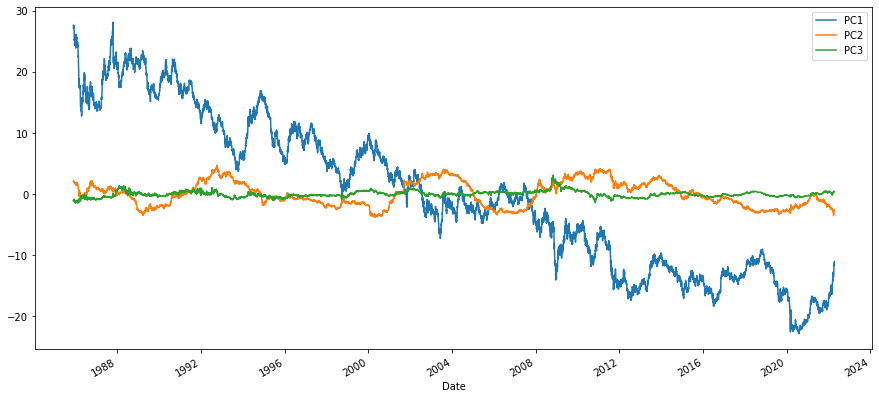

In [23]:
pcDf.plot(figsize=(15,7))
plt.show()

In [24]:
results

array([[ 27.6206706 ,   2.12666991,  -1.06565949],
       [ 27.51437291,   2.04669502,  -0.95254256],
       [ 27.33960365,   2.00261733,  -1.01884674],
       ...,
       [-11.57011455,  -2.58799821,   0.39767121],
       [-11.67078388,  -2.60299695,   0.39089012],
       [-11.01501995,  -2.55713557,   0.41763275]])

## Step 8 - Reconstruct the Time Series Data

- The original dataframe **"df"** can be thought of as a (9084 × 30) matrix with 9084 data points and 30 variables. By performing the PCA model, the original data are projected to the 3 principal axes. As a result, a (9084 × 3) matrix that is reduced its dimensionality from 30 to 3 can be used. 


- The new matrix can be inverted to the original matrix, the dimensionality would be increased from 3 to 30, the restored data would be similar to the original data due to the proportion of variance explained by the three components is 99%. They would be the same only if the components explain 100% of the variance.

In [25]:
results.shape

(9084, 3)

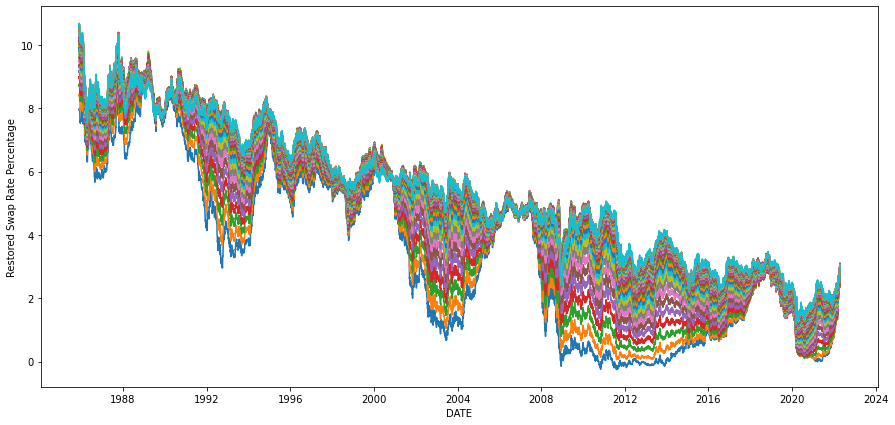

In [26]:
reconstruct = pca.inverse_transform(results)
plt.figure(figsize=(15,7))
plt.plot(df.index, reconstruct)
plt.ylabel("Restored Swap Rate Percentage")
plt.xlabel("DATE")
plt.show()